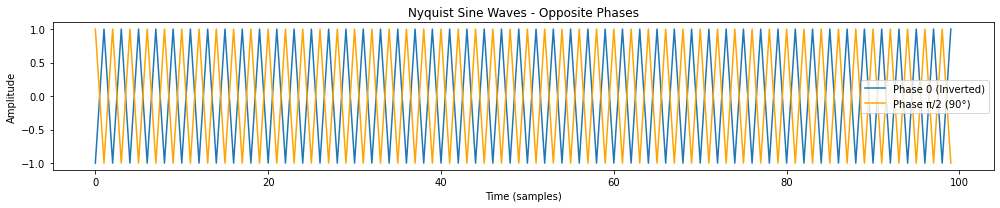

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def plot_nyquist_sine_waves(sampling_rate, duration):
    nyquist_frequency = sampling_rate / 2
    t = np.arange(duration)  # integer time vector

    sine_wave_90 = np.sin(2 * np.pi * nyquist_frequency * t / sampling_rate + np.pi / 2)  # Sine wave with phase π/2
    sine_wave_0 = np.sin(2 * np.pi * nyquist_frequency * t / sampling_rate - np.pi / 2)

    plt.figure(figsize=(14, 3))

    plt.plot(t, sine_wave_0, label="Phase 0 (Inverted)")
    plt.plot(t, sine_wave_90, label="Phase π/2 (90°)", color='orange')
    plt.title("Nyquist Sine Waves - Opposite Phases")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
sampling_rate = 44100  # 1000 Hz
duration = 100  # 100 samples
plot_nyquist_sine_waves(sampling_rate, duration)


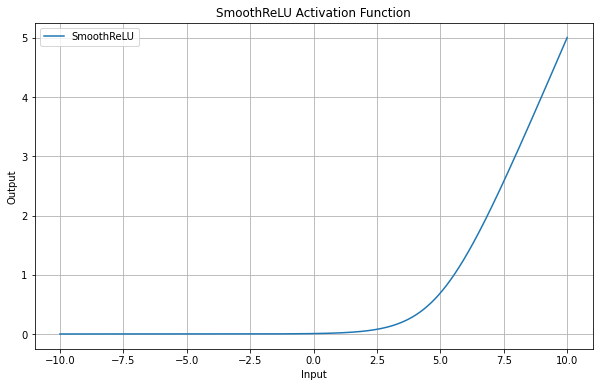

In [100]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SmoothReLU(nn.Module):
    def __init__(self):
        super(SmoothReLU, self).__init__()
        
    def forward(self, x):
        return  torch.log1p(torch.exp(x-5))  # Smooth approximation of ReLU

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label="SmoothReLU")
    plt.title("SmoothReLU Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
smooth_relu = SmoothReLU()

# Plot the SmoothReLU function
plot_activation_function(smooth_relu, [-10, 10])


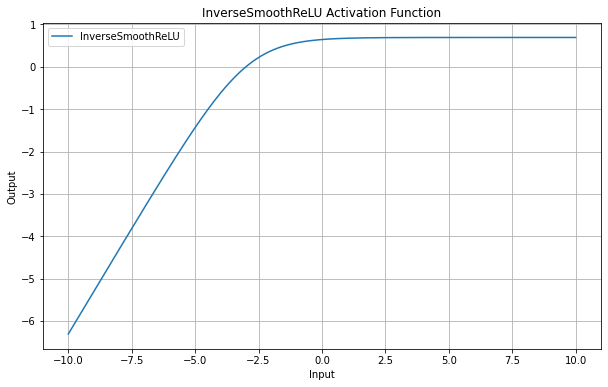

In [69]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class InverseSmoothReLU(nn.Module):
    def __init__(self):
        super(InverseSmoothReLU, self).__init__()
        
    def forward(self, x):
        return -torch.log1p(torch.exp(-x-3)) + np.log(2)  # Smooth approximation for the third quadrant

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label=activation_fn.__class__.__name__)
    plt.title(f"{activation_fn.__class__.__name__} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
inverse_smooth_relu = InverseSmoothReLU()

# Plot the InverseSmoothReLU function
plot_activation_function(inverse_smooth_relu, [-10, 10])


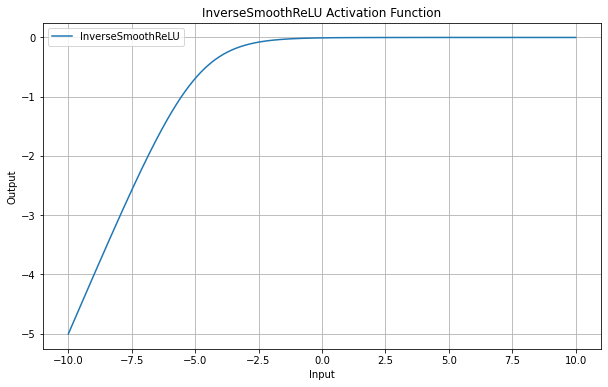

In [84]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class InverseSmoothReLU(nn.Module):
    def __init__(self):
        super(InverseSmoothReLU, self).__init__()
        
    def forward(self, x):
        return -torch.log1p(torch.exp(-x-5))

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label=activation_fn.__class__.__name__)
    plt.title(f"{activation_fn.__class__.__name__} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
inverse_smooth_relu = InverseSmoothReLU()

# Plot the InverseSmoothReLU function
plot_activation_function(inverse_smooth_relu, [-10, 10])


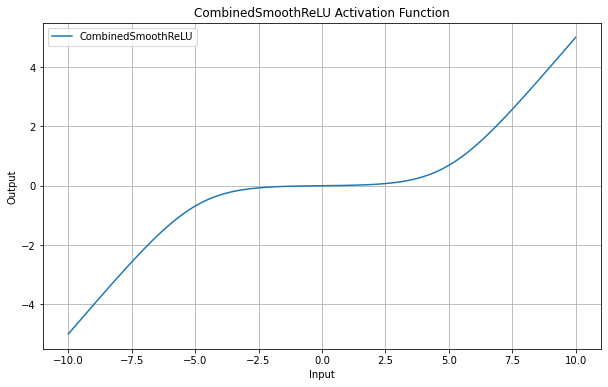

In [103]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class CombinedSmoothReLU(nn.Module):
    def __init__(self):
        super(CombinedSmoothReLU, self).__init__()
        
    def forward(self, x):
        smooth_relu = torch.log1p(torch.exp(x-5)) - 0.0067
        inverse_smooth_relu = -torch.log1p(torch.exp(-x-5)) + 0.0067 
        return torch.where(x >= 0, smooth_relu, inverse_smooth_relu)

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label=activation_fn.__class__.__name__)
    plt.title(f"{activation_fn.__class__.__name__} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
combined_smooth_relu = CombinedSmoothReLU()

# Plot the CombinedSmoothReLU function
plot_activation_function(combined_smooth_relu, [-10, 10])



In [85]:
inverse_smooth_relu(torch.tensor(0))

tensor(-0.0067)

In [102]:
smooth_relu(torch.tensor(0))

tensor(0.0067)

In [187]:
class DoubleDutchLayer(nn.Module):
    def __init__(self, sampling_rate, denominator):
        super(DoubleDutchLayer, self).__init__()
        self.sampling_rate = sampling_rate
        self.denominator = denominator
        self.frequency = sampling_rate / denominator
        self.activation = CombinedSmoothReLU()
        self.a1 = nn.Parameter(torch.tensor(1.0)) #randomize these.  
        self.a2 = nn.Parameter(torch.tensor(1.0))
        
    def reset_parameters(self):
        nn.init.uniform_(self.a1, -1.0, 1.0)
        nn.init.uniform_(self.a2, -1.0, 1.0)
    def forward(self, amplitude, t ):
        batch_size = t.shape[0]
        
        # Ensure sine waves are on the same device as amplitudes
        sine_wave_0 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate - np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_90 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate + np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        print(sine_wave_0.shape)
        # Multiply sine waves by amplitudes
        wave_0 = amplitude * self.a1 * sine_wave_0
        wave_90 = amplitude * self.a2 * sine_wave_90

        # Apply the CombinedSmoothReLU activation function
        output_0 = self.activation(wave_0)
        output_90 = self.activation(wave_90)

        return output_0 + output_90

In [177]:
sampling_rate = 44100
d1 = DoubleDutchLayer(sampling_rate,2)


In [178]:
t = torch.tensor([1,2,3,4,5])

In [179]:
d1(torch.tensor(2),t)

torch.Size([5])


tensor([0., 0., 0., 0., 0.], grad_fn=<AddBackward0>)

In [186]:
class DeepDutchNetwork(nn.Module):
    def __init__(self, sampling_rate, layers=10):
        super(DeepDutchNetwork, self).__init__()
        self.layers = nn.ModuleList()
        
        # Add learnable amplitude for the first layer
        self.initial_amplitude = nn.Parameter(torch.tensor(1.0))
        
        for i in range(layers, 0, -1):
            self.layers.append(DoubleDutchLayer(sampling_rate, 2**i))

    def forward(self, t):
        # Apply initial amplitude to the input for the first layer
        x = self.initial_amplitude
        
        for layer in self.layers:
            x = layer(x,t)
        return x
    
    def reset_parameters(self):
        nn.init.uniform_(self.initial_amplitude, -1.0, 1.0)
        for layer in self.layers:
            layer.reset_parameters()
    
    def print_denominators(self):
        for i, layer in enumerate(self.layers):
            print(f"Layer {i+1}: Denominator = {layer.denominator}")

In [192]:
sampling_rate = 44100
layers = 15
network = DeepDutchNetwork(sampling_rate,layers)


In [193]:
network.print_denominators()

Layer 1: Denominator = 32768
Layer 2: Denominator = 16384
Layer 3: Denominator = 8192
Layer 4: Denominator = 4096
Layer 5: Denominator = 2048
Layer 6: Denominator = 1024
Layer 7: Denominator = 512
Layer 8: Denominator = 256
Layer 9: Denominator = 128
Layer 10: Denominator = 64
Layer 11: Denominator = 32
Layer 12: Denominator = 16
Layer 13: Denominator = 8
Layer 14: Denominator = 4
Layer 15: Denominator = 2


In [190]:
network.reset_parameters()
network(t)

torch.Size([5])
torch.Size([5])
torch.Size([5])
torch.Size([5])
torch.Size([5])
torch.Size([5])
torch.Size([5])
torch.Size([5])
torch.Size([5])
torch.Size([5])


tensor([3.0697e-05, 0.0000e+00, 3.0697e-05, 0.0000e+00, 9.7789e-09],
       grad_fn=<AddBackward0>)

In [191]:
network

DeepDutchNetwork(
  (layers): ModuleList(
    (0): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (1): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (2): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (3): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (4): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (5): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (6): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (7): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (8): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
    (9): DoubleDutchLayer(
      (activation): CombinedSmoothReLU()
    )
  )
)